<a href="https://colab.research.google.com/github/zinoubm/Upwork_Portfolio/blob/main/Energy_Consumption_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading The Data
The data for this project is Downloaded from kaggle(A Famous platform for Data Sience), If you want to reproduce this note book follow the steps explained in [this article](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/) .

After downloading your kaggle credentials, upload the kaggle.json file to your google drive in a folder called kaggle.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Kaggle/kaggle.json' kaggle.json

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d nicholasjhana/energy-consumption-generation-prices-and-weather

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 79% 3.00M/3.81M [00:01<00:00, 2.84MB/s]
100% 3.81M/3.81M [00:01<00:00, 2.63MB/s]


In [2]:
! unzip /content/energy-consumption-generation-prices-and-weather.zip -d /content/data

Archive:  /content/energy-consumption-generation-prices-and-weather.zip
  inflating: /content/data/energy_dataset.csv  
  inflating: /content/data/weather_features.csv  


# Installing Libraries

In [3]:
! pip install darts==0.22.0
! pip install python-dateutil
! pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.9/451.9 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 KB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nfoursid 1.0.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
darts 0.22.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

In a paper released early 2019, forecasting in energy markets is identified as one of the highest leverage contribution areas of Machine/Deep Learning toward transitioning to a renewable based electrical infrastructure.

In this project we are going to forecast the **Total Load** using the Hourly energy demand generation and weather dataset.

## Acknowledgements
The dataset used in this project is publicly available via ENTSOE and REE.

## Metrics and Evaluation
In this notebook we are using **MAPE**, **MAE**, **R-squared**, **RMSE** and **RMSLE** for the Evaluation.

# Overview

# Exploratory data analysis
* Time Columns
  * Time Zones
  * Missing Values
  * Duplicates Handeling
* Creating Time Series
* Train/Test Split
* Basic Modeling
  * Exponential Smoothing
  * ARIMA Model
  * Naive Model
  * Facebook Prophet Model
* N-BEATS Model
* Results 

# Exploratory data analysis

In [5]:
# loading the data
df_energy = pd.read_csv('/content/data/energy_dataset.csv')
df_weather = pd.read_csv('/content/data/weather_features.csv')

Let's take a look at the first 6 rows of the dataset

In [6]:
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


And here's the weather dataset.

In [7]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


## Time Columns
Let's start our EDA by parsing the time columns from the energy and the weather datasets.

In [8]:
# parsing dates
from dateutil import parser
time_energy = df_energy['time'].apply(lambda x:parser.parse(x))
time_weather = df_weather['dt_iso'].apply(lambda x:parser.parse(x))

### Time zones
according to the data description The time columns are set to CET (UTC+1) but we found that 20k+ rows in the energy dataset and 100k+ rows in the weather dataset are in (UTC+2), So either the data entries are wrong and the time is in CET (not in UTC+2) or the data entries are correct and we just need to convert them to CET.

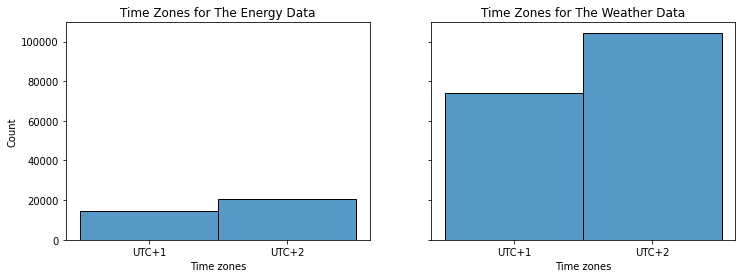

In [9]:
tz_energy = time_energy.apply(lambda x: "UTC+" + str(int(x.tzinfo.utcoffset(None).total_seconds()/3600)))
tz_weather = time_weather.apply(lambda x: "UTC+" + str(int(x.tzinfo.utcoffset(None).total_seconds()/3600)))


# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)
sns.histplot(tz_energy, ax=ax1)
ax1.set(title='Time Zones for The Energy Data', xlabel='Time zones')

sns.histplot(tz_weather, ax=ax2)
ax2.set(title='Time Zones for The Weather Data', xlabel='Time zones')

plt.show()

In a real world senario We could ask the data provider about this problem, Since we don't have acess to such information, In this notebook we will assume that the data entries are correct and we'll convert all of them to CET (UTC+1)

In [10]:
from datetime import datetime, timezone
import datetime

def to_cet(dt):
    return dt.replace(tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))

time_energy = time_energy.apply(to_cet)
time_weather = time_weather.apply(to_cet)

In [11]:
df_energy.index = pd.DatetimeIndex(time_energy)
df_weather.index = pd.DatetimeIndex(time_weather)

The Time index needs to be unique in a Time Serie, So we will drop duplicates.

In [12]:
# dropping duplicates

if not df_energy.index.is_unique:
    df_energy = df_energy.loc[~df_energy.index.duplicated(), :]

if not df_weather.index.is_unique:
    df_weather = df_weather.loc[~df_weather.index.duplicated(), :]
    
df_energy.index = pd.to_datetime(df_energy.index).tz_localize(None)
df_weather.index = pd.to_datetime(df_weather.index).tz_localize(None)

# df_energy['time'] = pd.to_datetime(df_energy['time']).dt.tz_localize(None)
# if some error check that


## Creating time series
We will create two time series one from the energy dataset and the other from the temprature dataset, We will try to use them in a multivariate model later.

In [13]:
from darts import TimeSeries

    
ts_energy = TimeSeries.from_dataframe(df_energy,
                                      value_cols="total load actual",
                                      fill_missing_dates=True, freq='H')

ts_temp = TimeSeries.from_dataframe(df_weather,
                                      value_cols="temp",
                                      fill_missing_dates=True, freq='H')

ts_hum = TimeSeries.from_dataframe(df_weather,
                                      value_cols="humidity",
                                      fill_missing_dates=True, freq='H')

In this step we will fill missing values and scale the Time series.

In [14]:
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.dataprocessing.pipeline import Pipeline

ts_filler_energy = MissingValuesFiller(verbose=False, n_jobs=-1, name="Fill NAs")
ts_scaler_energy = Scaler(verbose=False, n_jobs=-1, name="Scaling")

ts_filler_temp = MissingValuesFiller(verbose=False, n_jobs=-1, name="Fill NAs")
ts_scaler_temp = Scaler(verbose=False, n_jobs=-1, name="Scaling")

ts_filler_hum = MissingValuesFiller(verbose=False, n_jobs=-1, name="Fill NAs")
ts_scaler_hum = Scaler(verbose=False, n_jobs=-1, name="Scaling")

ts_pipeline_energy = Pipeline([ts_filler_energy, ts_scaler_energy])
ts_energy_processed = ts_pipeline_energy.fit_transform(ts_energy)

ts_pipeline_temp = Pipeline([ts_filler_temp, ts_scaler_temp])
ts_temp_processed = ts_pipeline_temp.fit_transform(ts_temp)

ts_pipeline_hum = Pipeline([ts_filler_hum, ts_scaler_hum])
ts_hum_processed = ts_pipeline_hum.fit_transform(ts_hum)

ts_energy_processed = ts_energy_processed.astype(np.float64)

ts_temp_processed = ts_temp_processed.astype(np.float64)

ts_hum_processed = ts_hum_processed.astype(np.float64)

Let's take a look to the energy data.

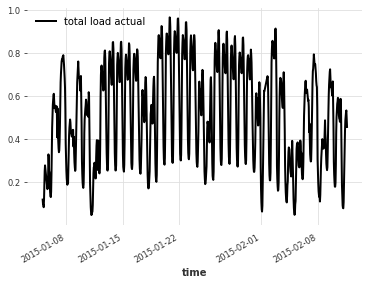

In [15]:
ts_energy_processed[100:1000].plot()

Moving averages are a great way to Understand our data in a forecasting context. Let's create **7-hours** and **28-hours** moving averages.

In [16]:
from darts.models.filtering.moving_average import MovingAverage

# Create 7-hour and 28-hour moving average of energy
ts_moving_average_7 = MovingAverage(window=7)
ts_moving_average_28 = MovingAverage(window=28)

In [17]:
ma_7_energy = ts_moving_average_7.filter(ts_energy_processed)
ma_28_energy = ts_moving_average_28.filter(ts_energy_processed)

ma_7_temp = ts_moving_average_7.filter(ts_temp_processed)
ma_28_temp = ts_moving_average_28.filter(ts_temp_processed)

ma_7_hum = ts_moving_average_7.filter(ts_hum_processed)
ma_28_hum = ts_moving_average_28.filter(ts_hum_processed)

In [18]:
def plot_along_ma(ts, ma_7, ma_28, num_days, label):
    plt.figure(100, figsize=(16, 5))
    ts[-24 * num_days:].plot(label=label)
    ma_7[-24 * num_days:].plot(label=f'7 days moving average for {label}')
    ma_28[-24 * num_days:].plot(label=f'28 days moving average for {label}')
    plt.plot()

Sample data from the Energy **Time Series**.

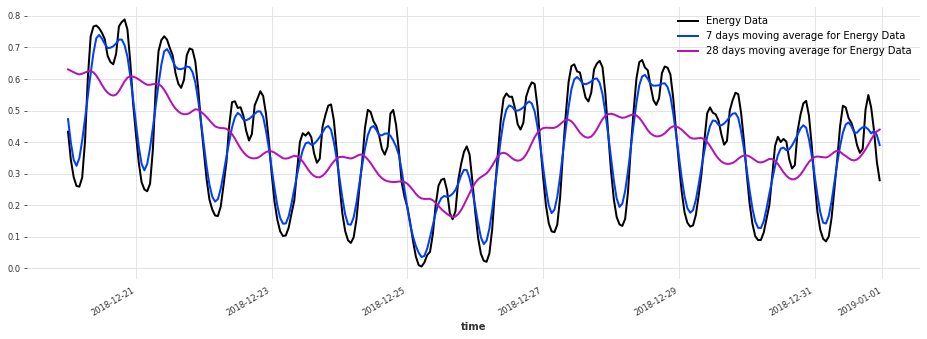

In [19]:
plot_along_ma(ts_energy_processed, ma_7_energy, ma_28_energy, 12, "Energy Data")

Sample data from the Temprature **Time Series**.

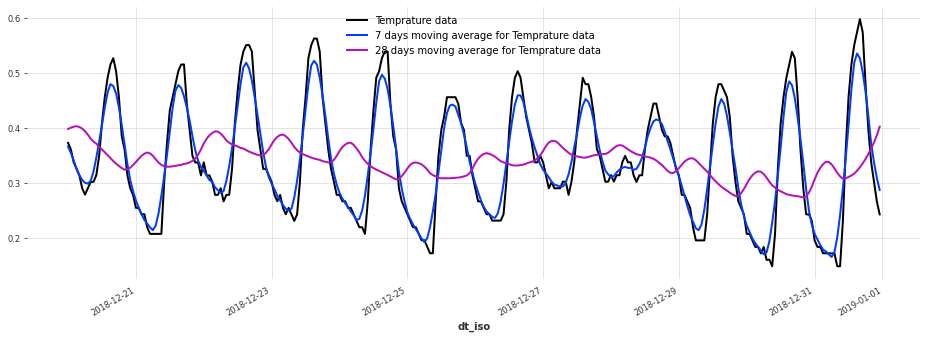

In [20]:
plot_along_ma(ts_temp_processed, ma_7_temp, ma_28_temp, 12, "Temprature data")

Some forecasting methods requires us to check for sesonality, So we will use ACF to check for that visually before using any systematic methods.

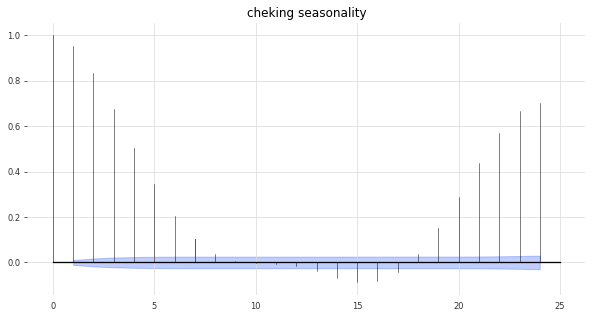

In [21]:
from darts.utils.statistics import plot_acf

plot_acf(ts_energy_processed, m=7, alpha=0.05)
plt.title("cheking seasonality")
plt.show()

Now will use the check_seasonality method that darts provides to find the sesonality of the Time series if it exists.

In [22]:
# check for seasonality, via ACF
from darts.utils.statistics import check_seasonality

ALPHA = 0.25
for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(ts_energy_processed, m=m
                                           , alpha=ALPHA
                                          )
    if is_seasonal:
        break

print("seasonal? " + str(is_seasonal))
if is_seasonal:
    print('There is seasonality of order {}.'.format(mseas))

seasonal? False


We can see that the Time series is not sesonal.

# Train / Test Split
In this notebook we will use 70% of the data for training, the remaining data will be used for testing.

In [23]:
from darts.utils.model_selection import train_test_split

train_energy, test_energy = train_test_split(data=ts_energy_processed, test_size=0.3)
train_temp, test_temp = train_test_split(data=ts_temp_processed, test_size=0.3)
train_hum, test_hum = train_test_split(data=ts_hum_processed, test_size=0.3)

We'll take a look at data, The blue portion is the testing data.

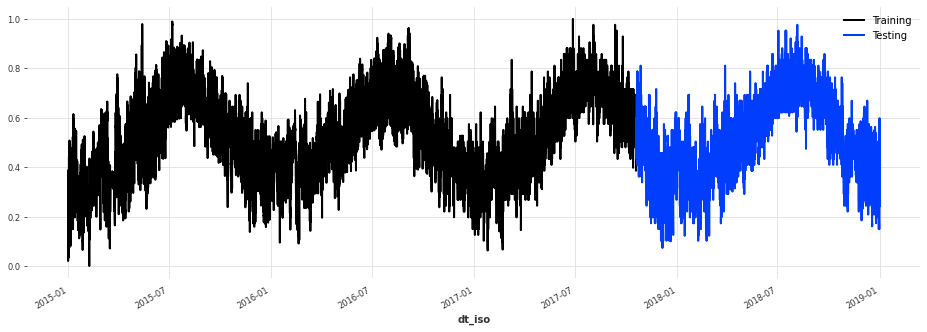

In [24]:
plt.figure(100, figsize=(16, 5))
train_temp.plot(label="Training")
test_temp.plot(label="Testing")

# Basic Modeling

In this notebook we will define an evaluation function, this function we train and then test our model, the return value will be a list of the forecast and accuracy.

In [25]:
import time

from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
)
from darts.metrics import mape, mase, mae, mse, ope, r2_score, rmse, rmsle


## fit the chosen forecaster model and compute predictions

def eval_model(model):
    t_start =  time.perf_counter()
    print("beginning: " + str(model))


    # fit the model and compute predictions
    res = model.fit(train_energy)
    forecast = model.predict(len(test_energy))

    # for naive forecast, concatenate seasonal fc with drift fc
    if model == m_naive:
        if is_seasonal:
            fc_drift = forecast
            modelS = NaiveSeasonal(K=mseas)
            modelS.fit([train_energy, train_temp, train_hum])
            fc_seas = modelS.predict(len(test_energy))
            forecast = fc_drift + fc_seas - train.last_value()


    # compute accuracy metrics and processing time
    res_mape = mape(test_energy, forecast)
    res_mae = mae(test_energy, forecast)
    res_r2 = r2_score(test_energy, forecast)
    res_rmse = rmse(test_energy, forecast)
    res_rmsle = rmsle(test_energy, forecast)
    res_time = time.perf_counter() - t_start
    res_accuracy = {"MAPE":res_mape, "MAE":res_mae, "R squared":-res_r2, "RMSE":res_rmse, "RMSLE":res_rmsle, "time":res_time}

    results = [forecast, res_accuracy]
    print("completed: " + str(model) + ":" + str(res_time) + "sec")
    return results

Also, we need to prepare our models for training.

In [26]:
# prepare Exponential Smoothing forecaster
if is_seasonal:
    m_expon = ExponentialSmoothing(seasonal_periods=mseas)
else:
    m_expon = ExponentialSmoothing()

m_naive = NaiveDrift()

# prepare facebook_prophet forecaster
m_prophet = Prophet()


# prepare ARIMA forecaster
import pmdarima as pmd
import statsmodels.api as sm 
from scipy.stats import normaltest

y = np.asarray(ts_energy_processed.pd_series())
# get order of first differencing: the higher of KPSS and ADF test results
n_kpss = pmd.arima.ndiffs(y, alpha=ALPHA, test='kpss', max_d=2)
n_adf = pmd.arima.ndiffs(y, alpha=ALPHA, test='adf', max_d=2)
n_diff = max(n_adf, n_kpss)

# get order of seasonal differencing: the higher of OCSB and CH test results
n_ocsb = pmd.arima.OCSBTest(m=max(4,mseas)).estimate_seasonal_differencing_term(y)
n_ch = pmd.arima.CHTest(m=max(4,mseas)).estimate_seasonal_differencing_term(y)
ns_diff = max(n_ocsb, n_ch, is_seasonal * 1)

# set up the ARIMA forecaster
m_arima = AutoARIMA(
    start_p=1, d=n_diff, start_q=1,
    max_p=4, max_d=n_diff, max_q=4,
    start_P=0, D=ns_diff, start_Q=0, m=max(4,mseas), seasonal=is_seasonal,
    max_P=3, max_D=1, max_Q=3,
    max_order=5,                       # p+q+p+Q <= max_order
    stationary=False, 
    information_criterion="bic", alpha=ALPHA, 
    test="kpss", seasonal_test="ocsb",
    stepwise=True, 
    suppress_warnings=True, error_action="trace", trace=True, with_intercept="auto")

Now we're ready to train our models.

In [27]:
models = [ 
    m_expon,
    m_arima,
    m_naive,
    m_prophet
]

model_predictions = [eval_model(model) for model in models]

beginning: ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None
completed: ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=24:5.959207558000003sec
beginning: Auto-ARIMA
Performing stepwise search to minimize bic


/usr/local/lib/python3.8/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=56.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : BIC=-79570.570, Time=6.64 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : BIC=-79568.603, Time=5.76 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : BIC=-79570.465, Time=14.97 sec
 ARIMA(0,2,0)(0,0,0)[0]             : BIC=-79580.678, Time=0.72 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 84.423 seconds


/usr/local/lib/python3.8/dist-packages/darts/metrics/metrics.py:458: RuntimeWarning: invalid value encountered in log
  y1, y2 = np.log(y1 + 1), np.log(y2 + 1)


completed: Auto-ARIMA:84.77669486600001sec
beginning: Naive drift model
completed: Naive drift model:0.0648867429999882sec
beginning: Prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmp61qei5um/0t0zkd_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61qei5um/kunjk_ih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90690', 'data', 'file=/tmp/tmp61qei5um/0t0zkd_x.json', 'init=/tmp/tmp61qei5um/kunjk_ih.json', 'output', 'file=/tmp/tmp61qei5um/prophet_model1hpiitak/prophet_model-20230104073250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


completed: Prophet:15.720690757sec


### Results

In [28]:
for result, model_name in zip(model_predictions, ['Exponential Smoothing', 'Arima', 'Naive Modeling', 'Facebook Prophet']):
    print('-------------------------')
    print(model_name)
    print(result[1])
    print('-------------------------')

-------------------------
Exponential Smoothing
{'MAPE': 31.608502562937897, 'MAE': 0.13318280331819626, 'R squared': -0.37131666166628763, 'RMSE': 0.1604053664364314, 'RMSLE': 0.10722342459259429, 'time': 5.959207558000003}
-------------------------
-------------------------
Arima
{'MAPE': 17373.252466737, 'MAE': 62.4789537490051, 'R squared': 127188.23824054391, 'RMSE': 72.14863210364129, 'RMSLE': nan, 'time': 84.77669486600001}
-------------------------
-------------------------
Naive Modeling
{'MAPE': 65.47517628273545, 'MAE': 0.17996116199561762, 'R squared': 0.12103618016337991, 'RMSE': 0.21419667897042965, 'RMSLE': 0.14914349666338525, 'time': 0.0648867429999882}
-------------------------
-------------------------
Facebook Prophet
{'MAPE': 24.128318531118865, 'MAE': 0.08933558178482975, 'R squared': -0.6572069263033884, 'RMSE': 0.11844560143380592, 'RMSLE': 0.07905109988323097, 'time': 15.720690757}
-------------------------


We can that the **Facebook Prophet** model is doing really well, Let's take a look at it's results.

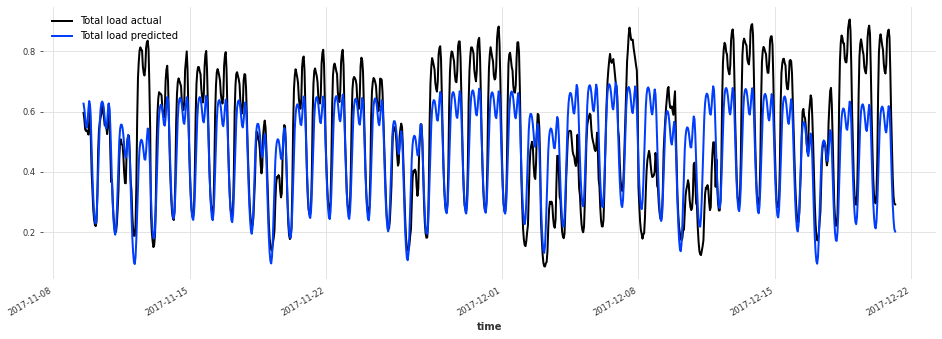

In [29]:
plt.figure(100, figsize=(16, 5))
res = m_prophet.predict(len(test_energy))
start = 500
window = 1000
test_energy[start:(start+window)].plot(label='Total load actual')
res[start:(start+window)].plot(label='Total load predicted')
plt.show()

The predictions are reasonable for This kind of problems.
So, the model is doing pretty well, Now we're done with Basic algorithms. We will try to use some **Deep Learning** models.

## N-Beats Model
I'm not expecting too much from this one, because **Deep Learning** models requires lot's of data, But It's nice to give it a try.

In [30]:
from darts.models import RNNModel, NBEATSModel

# m_rnn = RNNModel()
m_nbeats = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=5, random_state=0, pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    })

m_nbeats.fit([train_energy, train_temp, train_hum])

forecast = m_nbeats.predict(len(test_energy), train_energy)

# compute accuracy metrics and processing time
res_mape = mape(test_energy, forecast)
res_mae = mae(test_energy, forecast)
res_r2 = r2_score(test_energy, forecast)
res_rmse = rmse(test_energy, forecast)
res_rmsle = rmsle(test_energy, forecast)

res_accuracy = {"MAPE":res_mape, "MAE":res_mae, "R squared":-res_r2, "RMSE":res_rmse, "RMSLE":res_rmsle}
print(res_accuracy)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 2298it [00:00, ?it/s]

{'MAPE': 91.09361869329501, 'MAE': 0.25104447737765434, 'R squared': 1.1076317275495535, 'RMSE': 0.29369752196730736, 'RMSLE': 0.19700249434159942}


## Plotting Results
As we expected the model performace is really poor, But could be easilly improved in the future.

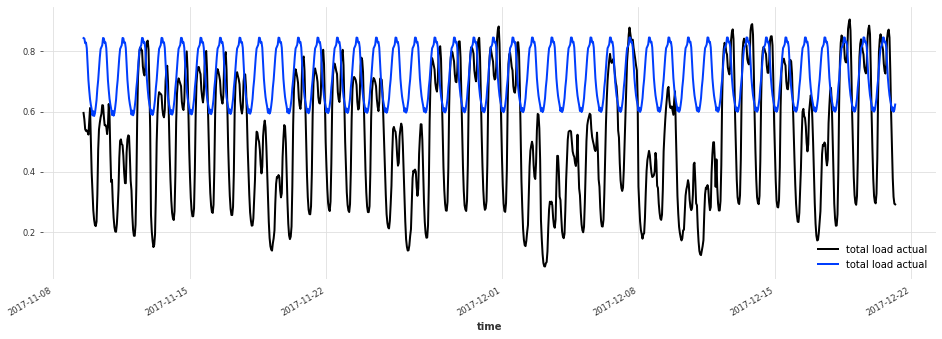

In [31]:
plt.figure(100, figsize=(16, 5))
start = 500
window = 1000
test_energy[start:(start+window)].plot()
forecast[start:(start+window)].plot()
plt.show()

# Conclusion
In this notebook we found that classical Models are best suited for this dataset, With the **Facebook Prophet** taking the lead.

Here are the results for the **Facebook Prophet** model:

| Metric | Value |
| --- | --- |
| MAE | 0.08 |
| R squared | 0.65 |
| RMSE | 0.11 |
| RMSLE | 0.07 |
| MAPE | 24.0 |
